In [1]:
import pandas as pd

df=pd.read_csv('./data/wine.csv',header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [2]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]


In [3]:
#모델 저장
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True ,random_state=42)


In [4]:
#checkpoint를 통해 모델 업데이트
from tensorflow.keras.callbacks import ModelCheckpoint
model_path = './data/model/all/{epoch:02d}-{val_accuracy:.4f}.hdf5'
checkpointer= ModelCheckpoint(model_path, verbose=1)

In [5]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense

# #모델생성
# model=Sequential()
# model.add(Dense(30, activation='relu', input_dim=(X.shape[1])))
# model.add(Dense(12, activation='relu'))
# model.add(Dense(8, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))
# #모델 컴파일
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# #모델 실행 
# model.fit(X_train, y_train, epochs=100, batch_size=64,validation_split=0.25,
#           callbacks=[checkpointer],verbose=0) #validation_split 은 검증을 
# #모델 결과 출력
# score=model.evaluate(X_test, y_test)
# print('loss:',score[0],'test accuracy:',score[1])

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model=Sequential()
model.add(Dense(30, activation='relu', input_dim=(X.shape[1])))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
#모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#모델 실행 
history=model.fit(X_train, y_train, epochs=2000, batch_size=500,validation_split=0.25,verbose=0)

In [9]:
import pandas as pd
hist_df=pd.DataFrame(history.history)
hist_df

,loss,accuracy,val_loss,val_accuracy
0,0.277301,0.908134,0.220563,0.924615
1,0.219539,0.928663,0.199731,0.933846
2,0.199534,0.930973,0.194027,0.937692
3,0.193368,0.931999,0.191508,0.940000
4,0.189483,0.932769,0.187083,0.936923
...,...,...,...,...
1995,0.028692,0.992302,0.067032,0.986923
1996,0.026435,0.993585,0.062658,0.986923
1997,0.026188,0.993072,0.067076,0.986154
1998,0.026488,0.992815,0.062429,0.988462


In [10]:
import matplotlib.pyplot as plt
import numpy as np

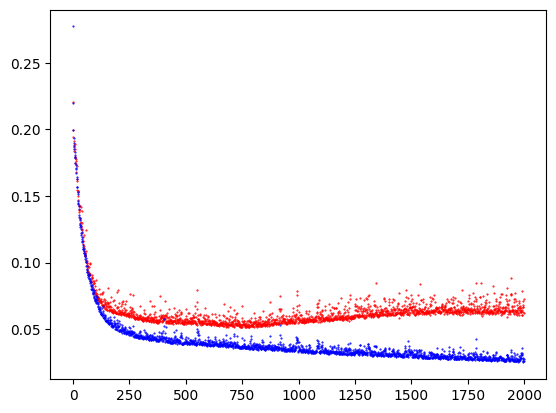

In [13]:
y_vloss=hist_df['val_loss']
y_loss=hist_df['loss']

#그래프로 확인 (에러->손실함수의 결과)


x_len=np.arange(len(y_vloss))
plt.plot(x_len,y_vloss,'o',c='red',markersize=0.5,label='Validation Loss')
plt.plot(x_len,y_loss,'o',c='blue',markersize=0.5,label='train Loss')
plt.show()

In [14]:
#중단점 설정
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_callback = EarlyStopping(patience =20)
checkpointer = ModelCheckpoint(filepath=model_path,monitor='val_loss',verbose=0,save_best_only=True)
history=model.fit(X_train,y_train,batch_size=500,epochs=2000,validation_split=0.25,verbose=1,callbacks=[early_stopping_callback,checkpointer])

Epoch 1/2000
8/8 [==============================] - 0s 33ms/step - loss: 0.0274 - accuracy: 0.9936 - val_loss: 0.0612 - val_accuracy: 0.9877
Epoch 2/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0274 - accuracy: 0.9931 - val_loss: 0.0662 - val_accuracy: 0.9885
Epoch 3/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0280 - accuracy: 0.9933 - val_loss: 0.0742 - val_accuracy: 0.9838
Epoch 4/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0285 - accuracy: 0.9928 - val_loss: 0.0632 - val_accuracy: 0.9877
Epoch 5/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0262 - accuracy: 0.9933 - val_loss: 0.0679 - val_accuracy: 0.9862
Epoch 6/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0274 - accuracy: 0.9926 - val_loss: 0.0692 - val_accuracy: 0.9862
Epoch 7/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0292 - accuracy: 0.9918 - val_loss: 0.0729 - val_accuracy: 0.9854
Epoch 8/2000


SyntaxError: 'return' outside function (3490987594.py, line 2)